# A Guide To NumPy


## Introduction


### About the author

Ricky Dunbar doesn't know how to do his own taxes or light a fire with two sticks, but he does know NumPy. He's been using it for over five years to work with very large datasets in his work in the renewable energy industry. He holds a PhD in physics and currently works in Silicon Valley, USA.


### What is NumPy?

NumPy is one of the key data science libraries in Python. Concisely put, NumPy is a library that supports large multi-dimensional data arrays and provides functions to  manipulate them. You will probably encounter NumPy a lot in the Python world. In fact, NumPy can be considered to be a central package for python's data science capabilities both for its stand-alone functionality and as a dependency of other key packages. If you're looking for exposure to the NumPy tools that should be in every data scientist's toolbox - such as vectorizaiton, manipulation of NumPy arrays, and pseudo-random number generation - then this is the guide for you!

If you'd like to find out more about something we encounter in this article, the online documentation (https://numpy.org/doc/) is a great place to look, both to get more details and to check that you're implementing NumPy accordning to most recent recommended usage. 

### When should you start using NumPy?

After you're comfortable with the Python environment and common commands, then you are ready to start importing libraries into your code. NumPy could be a good candidate for that first library. Once you feel comfortable with NumPy, you can expand your data science and scientific computing capabilities by using other libraries like SciPy and pandas.

### An Alternative to MATLAB?
Most readers will likely be familiar with the commercial scientific computing software MATLAB. NumPy, when used together with other Python libraries like SciPy and Matplotlib, can be considered as a fully-fledged alternative to MATLAB's core functionality. In fact the Python solution is quite an attractive alternative, for the following reasons:
- Python is open-source, which means that you have the option of inspecting the source code yourself
- Learning Python can give a new programmer access to the vast and ever-growing realm of possibilities open to Python users
- It's free (no further explanation needed)

### Installation

To check if NumPy is already installed in your Python installation (it most likely is), run the following command:

In [242]:
import numpy as np

If no error message is returned, that's a good sign NumPy is already available. If you get an error message like 

<font color=red>ModuleNotFoundError:</font> No module named 'numpy'

this probably means that NumPy needs to be installed first. If you use the pip Python package manager, the required command is 'pip install numpy'. If you need more detailed installation instructions, refer to https://numpy.org/. 

It should also be noted that this article has been prepared in a jupyter notebook. If you'd like to play around with the examples we encounter, you can download jupyter from https://jupyter.org/ and a copy of this notebook from https://github.com/Ricky-PV/introduction-to-numpy.git.



## Section 1: The basics

### NumPy arrays

The NumPy array - an n-dimensional data structure - is the central object of the NumPy package. A one-dimensional NumPy array can be thought of as a vector, a two-dimensional array can be thought of as a matrix, and a three-dimensional array can be thought of as a tensor (a set of matrices). Arrays with arbitrarily higher dimensions - including those with so many dimensions that it is no longer humanly possible to conceptualize them - are possible too. 

The data stored in an array can have various formats, including integers, floating-point numbers and strings, but within one array the type must be homogenous. If you want to do work with arrays of mixed types it is a good idea to consider using Numpy's *record array* format, or pandas dataframes instead (a great learndatasci.com tutorial on pandas can be found here: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) . In this article though, we'll restrict our focus to conventional NumPy arrays.


### Defining arrays

NumPy arrays can be defined in a number of ways. 

##### Defining arrays, example 1
If we want to define an array manually, we can use the np.array() function. In the below example, we pass a list of two elements, each element being a list of two values, creating a 2x2 matrix:

In [243]:
array_a = np.array([[1,2],[3,4]])
array_a

array([[1, 2],
       [3, 4]])

It's as simple as that. Once we have our data in a NumPy array, a huge suite of computing possibilities become available. Much of this article is concerned with exploring these possibilities.

NumPy has numerous functions for generating commonly used arrays without having to enter the elements manually. A few of those are shown below:

##### Defining arrays, example 2
The function np.arange() is great for creating vectors easily. Here, we create a vector with values spanning 1 up to (but not including) 5:

In [244]:
np.arange(1,5)

array([1, 2, 3, 4])

##### Defining arrays, example 3

In many programming tasks, it can be useful to initialize a variable and then write a value to it later in the code. If that variable happens to be a NumPy array, a common approach would be to create it as an array with zeros in every element. The function np.zeros() can be used to do this. Here, we create an array of zeros with 3 rows and 1 column.

In [245]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

##### Defining arrays, example 4

Similarly, np.full() creates an array a repeating fixed value (zero or otherwise), according to the specified dimensions. Here we create an 2x3 array with the number 7 in each element:

In [246]:
np.full((2,3),7)

array([[7, 7, 7],
       [7, 7, 7]])

##### Reading data from a file into an array

While defining arrays in this way is useful, in most data science applications our datasets will be quite large and will usually be available to us in a file. In this situation it is likely that we'll want to load the data into a NumPy array programmatically.

As an example, let's take some publicly-available data from the U.S. Energy Information Administration. The dataset we'll use contains data an historic electricity generation in the USA from a range of sources. You can download the file, MER_T07_02A.csv, here: https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T07.02A). 

Here, we'll use the csv module to import the data. It's worth noting that NumPy also has functions to read data files directly into NumPy arrays - like np.genfromtxt() - but it just so happens they don't work so well for importing this particular dataset.

In [247]:
import csv

data = [] #initialize an empty list
with open('MER_T07_02A.csv', 'r') as csvfile:
    file_reader = csv.reader(csvfile, delimiter=',')
    for row in file_reader:
        data.append(row) #append each row to the list
        
data = np.array(data) #convert the list of lists to a NumPy array

We now have our data stored in a NumPy array that we've named *data*. For much of the remainder of this article we'll be exploring how NumPy's functionality can be used to manipulate, and gain insights into this dataset.

First, we'll explore some properties, which are denoted as *attributes*, of the array. One thing that we may want to know about an array is its dimensions. We can access this information easily using the shape attribute:

In [248]:
data.shape

(8191, 6)

For this two-dimensional array, the output is a 1X2 tuple of length 2, with the first element containing the number of rows and the second containing the number of columns. 

In [249]:
num_rows = data.shape[0] 
num_cols = data.shape[1]
print('Our array has', num_rows, 'rows and', num_cols, 'columns.')

Our array has 8191 rows and 6 columns.


If you're familiar with pandas, you might have noticed that the syntax we to obtain the number rows and columns in the NumPy array is strikingly similar to the equivalent in pandas. As we continue to explore NumPy arrays, you may notice many more simularities like this.

Another property of a NumPy array that we may wish to know is its data type. This information is stored in the dtype attribute, which we now access to determine that in our case our array is made up of strings:

In [250]:
data.dtype.type

numpy.str_

### Indexing

At some point, it will certainly be neccessary to index (select) certain subsets of a NumPy array. For instance, you might want to perform a manipulation on one column of the array but not the others, or you want want to simply select a certain column to plot. 

In the following code we'll explore some useful examples of how this can be done.

##### Indexing example 1: 
Let's say we were interested in all rows in the 4th column. We can use the following syntax to index this array section: array[start_row:end_row, col]

In [251]:
data[0:num_rows,4]

array(['Description', 'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors', ...,
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype='<U80')

As indicatied from the first element (the header for the column), column 4 contains a description of the electricity sector for which the data in that row pertains. Note that the result is an 8191 x 1 array, which would have been quite a lot to print to the screen. Jupyter automatically recognized this and hid most of the elements; only the first two and last three elements were printed, separated by an ellipsis.

##### Indexing example 2: 
We can also use a colon to denote *all* rows, or *all* columns. Here, we will index column 4, and include all rows. This will generate equivalent output to the previous command

In [252]:
data[:,4]

array(['Description', 'Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Coal, All Sectors', ...,
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype='<U80')

##### Indexing example 3: 
The format from example 1 can be used for columns too (or any dimension of a higher dimensional array). This is the corresponding syntax: array[start_row:end_row, start_col:end_col]. The following indexes all rows in the second column through to (but not including) the 4th column:

In [253]:
data[0:num_rows,2:4]

array([['Value', 'Column_Order'],
       ['135451.32', '1'],
       ['154519.994', '1'],
       ...,
       ['351342.905', '13'],
       ['411583.828', '13'],
       ['401363.186', '13']], dtype='<U80')

##### Indexing example 4:
Instead of indexing a range of columns, it can also be useful to specify them explictly. To do this we just include the columns we want to use in a list. Let's index the 5 rows after the header of columns 2 and 3. This time, we'll write the output to a new array, which we'll call *subset* for use again in the subsequent example.

In [254]:
subset = data[1:6,[2,3]]
subset

array([['135451.32', '1'],
       ['154519.994', '1'],
       ['185203.657', '1'],
       ['195436.666', '1'],
       ['218846.325', '1']], dtype='<U80')

##### Indexing example 5: using mask arrays
Another convenient way to index certain sections of a NumPy array is to use a mask array. A mask array, also known as a logical array, is an array containing boolean elements (i.e. True or False). Indexing of a given array element is determined by the value of the corresponding element of the mask array.

In [255]:
mask_array = np.array([False, True, False, True, True])

subset2 = subset[mask_array]#retain only the rows that correspond to elements that are True in the mask array

print("Indexed array:\n", subset2, '\n')


Indexed array:
 [['154519.994' '1']
 ['195436.666' '1']
 ['218846.325' '1']] 



As you can see, the rows corresponding to *True* in the Mask array were retained, while those corresponding to *False* were excluded. It is worth noting that a similar approach can be used to index pandas dataframes.

This is an incredibly useful method, as it allows us to index elements based on logical expressions.  We'll make good use of this approach later in the article.

### Concatenating 

NumPy also provides useful functions for concatenating arrays. Let's say we wanted to restrict our attention to the first and last three rows of our dataset. First, we'll define new sub-arrays as follows:

In [256]:
array_start = data[:3,:]
array_start

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

In [257]:
array_end = data[-3:,:]
array_end

array([['ELETPUS', '201906', '351342.905', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '201907', '411583.828', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '201908', '401363.186', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Note that above we specified a negative index, which NumPy accepts as a shorthand for indexing from the *end* of the array. 

To concatenate these arrays we can use np.vstack, where the *v* denotes vertical, or row-wise, stacking of the sub-arrays:

In [258]:
np.vstack((array_start, array_end))

array([['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'],
       ['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '201906', '351342.905', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '201907', '411583.828', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours'],
       ['ELETPUS', '201908', '401363.186', '13',
        'Electricity Net Generation Total (including from sources not shown), All Sectors',
        'Million Kilowatthours']], dtype='<U80')

The horizontal counterpart of np.vstack() is np.hstack(), which we can use to combine sub-arrays column-wise. The function that is usually used for higher dimensions is np.concatenate(). The syntax for this function is similar to the 2D versions, with the additional requirement that the axis along which concatenation is to be performed is specified. Calling np.concatenate((array_start, array_end), axis = 0) would generate identical output to that generated with  np.vstack(), above.



## Section 2: Must-know tools

Let's now look at three NumPy tools that are especially handy in data science applications: broadcasting, vectorization, and pseudo-random number generation. For this section, we'll put our electricity dataset to one side and stick to some more simple examples. In section 3, we'll return to the electricity dataset and combine everything we'll have learnt up until then.

### Broadcasting

Broadcasting is a process performed by NumPy that allows mathematical operations to be performed with objects that don't necessarily have compatible dimensions. What exactly is meant by that? Let's explore this using some examples. 

##### Broadcasting example 1:

Suppose we had a 2x2 array, and suppose we wanted to add 1 to each element in the array. With NumPy arrays, it is as simple as:

In [259]:
print( array_a, '\n\n', array_a + 1)

[[1 2]
 [3 4]] 

 [[2 3]
 [4 5]]


Keep in mind that any university linear algebra lecturer would be furious if you even mentioned the notion of adding a scalar to a matrix. And not without reason: it simply isn't a mathematically valid operation. However what NumPy is actually doing in the background *is* valid. Behind the scenes, NumPy creates a second array with value 1 for all elements, and then adds it to the first array, in other words NumPy has *broadcast* the scalar to a new array of appropriate dimensions to perform the computation. And, of course, it does so in a very computationally efficient way. This computational efficiency is one of the key advantages of using broadcasting in your code. Broadcasting may also make your code simpler and more readable as well.

Let's look at some more examples. 

##### Broadcasting example 2:

Next, we'll try multiplication.

In [260]:
array_a*2

array([[2, 4],
       [6, 8]])

##### Broadcasting example 3:

Broadcasting can be used in cases beyond just overcoming the dimensional mismatch between a scalar and an array. NumPy can also broadcast arrays to enable computations with other arrays. Let's say that each row of array_a, defined above, contains co-ordinates of two objects; one object is located at (x = 1, y = 2) and the other is located at (x = 3, y = 4). If we want to know the co-ordinates of both objects if they both were translated by 3 units in the x direction and 1 unit in the y direction, all we would need to type would be:

In [261]:
array_a + np.array([3,1])

array([[4, 3],
       [6, 5]])

This time, NumPy created a second 2x2 matrix (in the background), with both rows equal to [3,1] and then performed the operation with that, i.e. it *broadcast* the 1x2 array to one appropriate to perform the operation with the 2x2 array.

For other ways in which broadcasting can be used, the best place to look is the documentation: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#broadcasting

### Vectorization
Vectorization is the process of modifying code to utilize array operation methods. Array operations can be computed internally by NumPy using a lower-level language, which leads to a number of benefits:
- Vectorized code tends to execute much faster than equivalent code that uses loops (such as for-loops and while-loops). Usually a *lot* faster. Therefore, vectorization can be very important for machine learning, where we often work with large datasets 
- Vectorized code can often be more compact, which means there are fewer lines of code to write, which could potentially speed-up the code-writing process
- Having fewer lines of code to write could also be helpful in reducing the risk of errors.  

##### Vectorization example 1
Let's consider a problem where we have two one-dimensional arrays, *a* and *b*, and we need to multiply each element in *a* with the corresponding element in *b*.

In [262]:
#define some arbitrary values for a and b
a = np.arange(1,51)
b = np.arange(51,101)

#Non-vectorized version
def non_vectorized_output(a,b):
    output = []
    for j in range(len(a)):
        output.append(a[j]*b[j])
    return output
    
#Vectorized version
def vectorized_output(a,b):
    return a*b

As you can see, the looping in the non-vectorized version is performed in pure Python (i.e. without using NumPy) with a for-loop. Although it would be difficult to make this non-vectorized code fuction any simpler or more compact, it is still occupies three more lines of code than the vectorized version. This is in part because the looping in the vectorized version happens in the background. 

It's clear that vectorized code can more compact, but what is the difference in computation time? To do this, we'll use the *timeit* library, following an example implementation from a good article on timing python code (https://www.pythoncentral.io/time-a-python-function/)

In [263]:
import timeit

#We'll define a wrapper function to allow us to use the timeit function for functions with arguments
def wrapper(func, *args, **kwargs):
     def wrapped():
         return func(*args, **kwargs)
     return wrapped

number_executions = 100000 #number of times to execute each function to calculate average execution time
    
#Measure computation time for the non-vectorized version
wrapped = wrapper(non_vectorized_output, a, b)
nv_time = timeit.timeit(wrapped, number = number_executions)
print('Non-vectorized version:', f'{1E6*nv_time/number_executions:0.2f}', 'microseconds per execution, average')
    
#Measure computation time for the vectorized version
wrapped = wrapper(vectorized_output, a, b)
v_time = timeit.timeit(wrapped, number = number_executions)
print('Vectorized version:', f'{1E6*v_time/number_executions:0.2f}', 'microseconds per execution, average')

print('Computation was', "%.0f" % (nv_time/v_time), 'times faster using vectorization')

Non-vectorized version: 21.03 microseconds per execution, average
Vectorized version: 0.60 microseconds per execution, average
Computation was 35 times faster using vectorization


##### Vectorization example 2
In this second example we'll evaluate a set of linear expressions. Similar to the first example, this could be evaluated either using for-loops or using vectorized code. In this case, the vectorized version will use matrix multiplication to evaluate the lineal expressions. If you're familiar with machine learning, the next paragraph will provide some context about when you might encounter this is ML. If you're not, feel free to skip it!

Let's imagine a machine learning problem where we use a linear regression algorithm to model the cost of electricity. Let's denote our model features - which could represent things like the the amount of available wind energy, the current price of gas, and the current load on the grid - as $x_1, x_2 ... x_{n}$. After we train the algorithm, we obtain model parameters, $\theta_0,\theta_1,\theta_2...\theta_{n}$, which constitute the *weights* that should be used for each feature. For instance, if $x_2$ were to represent the price of gas, and the model found that this was a particularly decisive factor in determining the price of electricity, then the corresponding weight, $\theta_2$ would be expected to be much larger in magnitude than the other weights. The hypothesis, or prediction, returned by our linear regression model for a given set of $x$, is a *linear expression*, $h=\theta_0 + x_1 \theta_1 + x_2 \theta_2 + ... + x_{n} \theta_{n}$n.  Furthermore, let us assume we have a set of $m$ test examples i.e. $m$ sets of $x$ for which we would like to obtain the model's prediction. Therefore, the linear expression, $h$, is to be calculated for each of the test examples, i.e, there will be a total of $m$ individual hypothesis outputs. As we'll see below, this can all be calculated concisely using one vectorized statement. To start, we'll define some arbitrary values for x, the array of test examples, and theta, the vector of model parameters. In a ML problem, our model parameters would be calculated as an output of an optimization procedure, but here we'll just use arbitrary values.

In [264]:
#define a 10x4 array, x, where each row is a training set. Here, m=10, n = 4
x = np.arange(1,41).reshape(10,4) 

#add a column of ones to represent x0, known in machine learning as the bias term. x is now a 10x5 array
x = np.hstack((np.full((10,1),1),x))

#model parameters, a 5x1 array
theta = np.arange(1,6).reshape(5,1)

print('The arrays we will use for matrix multiplication are:\n\n', x, '\n\n',theta)

The arrays we will use for matrix multiplication are:

 [[ 1  1  2  3  4]
 [ 1  5  6  7  8]
 [ 1  9 10 11 12]
 [ 1 13 14 15 16]
 [ 1 17 18 19 20]
 [ 1 21 22 23 24]
 [ 1 25 26 27 28]
 [ 1 29 30 31 32]
 [ 1 33 34 35 36]
 [ 1 37 38 39 40]] 

 [[1]
 [2]
 [3]
 [4]
 [5]]


Now that we have our matrix, $x$, and vector, $\theta$, we'll proceed to define vectorized and non-vectorized versions of evaluating the linear expressions and compare the computation time.

In [265]:
#Non-vectorized version
def non_vectorized_output(x,theta):
    h = []
    for i in range(x.shape[0]):
        total = 0
        for j in range(x.shape[1]):
            total = total + x[i,j]*theta[j,0]
        h.append(total)
    return h
    
#Vectorized version
def vectorized_output(x,theta):
    h = np.matmul(x,theta)#NumPy's matrix multiplication function
    return h

#Measure computation time for the non-vectorized version
wrapped = wrapper(non_vectorized_output, x,theta)
nv_time = timeit.timeit(wrapped, number = number_executions)
print('Non-vectorized version:', f'{1E6*nv_time/number_executions:0.2f}', 'microseconds per execution, average')


#Measure computation time for the vectorized version
wrapped = wrapper(vectorized_output, x, theta)
v_time = timeit.timeit(wrapped, number = number_executions)
print('Vectorized version:', f'{1E6*v_time/number_executions:0.2f}', 'microseconds per execution, average')

print('Computation was', "%.0f" % (nv_time/v_time), 'times faster using vectorization')

Non-vectorized version: 33.47 microseconds per execution, average
Vectorized version: 1.32 microseconds per execution, average
Computation was 25 times faster using vectorization


The vastly improved computational performance that we achieved in the two examples above by vectorizing the code is not atypical. However, vectorization does have potential disadvantages. Vectorized code has the potential to be less readable/intuitive, and is can be more memory intensive. The skill of knowing how much vectorization to use in your code is something that you'll develop with experience, and the decision will always need to be made based on the nature of the application in question.

### Pseudo-random number generation

Before we finish this section, there is one more NumPy functionality that we should touch on: pseudo-random number generation. Being able to generate pseudo-random numbers is often necessary in data science applications, such as  modeling system noise and  Monte Carlo simulations. Below we'll see how to generate random numbers, *x*, from two commonly encountered probability distributions: the uniform distribution and the normal (Gaussian) distribution.

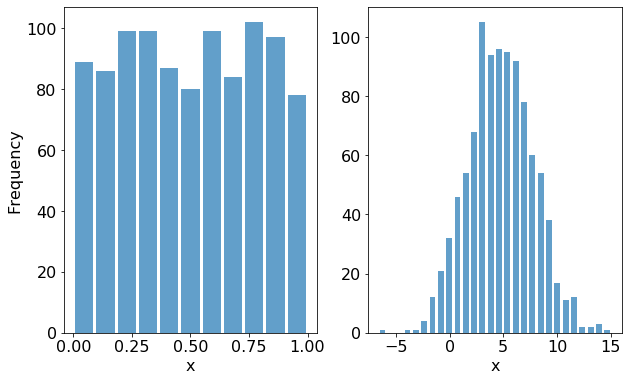

In [266]:
import matplotlib.pyplot as plt #importing functions from the matplotlib plotting library
import matplotlib

#set some default plotting parameters
matplotlib.rcParams.update({'font.size': 16,
                           'figure.figsize': [10, 6],
                           'lines.markersize': 6
                           })

fig = plt.figure() #Define the figure

#Uniform distribution
ax1 = fig.add_subplot(1,2,1) #define plotting axis
d = np.random.rand(1000) #Generate a NumPy array with 1000 samples randomly selected from a uniform distribution
ax1.hist(x=d, bins='auto',alpha=0.7, rwidth=0.85) #plot the histogram

#Normal distribution
ax2 = fig.add_subplot(1,2,2)
d = np.random.normal(loc=5, scale=3.0, size=1000) #Generate a NumPy array with 1000 samples from 
# a normal distribution, centred at 5 with a standard deviation of 3
ax2.hist(x=d, bins='auto', alpha=0.7, rwidth=0.7)

ax1.set_ylabel('Frequency')
ax1.set_xlabel('x')
ax2.set_xlabel('x')
plt.show()

As we'd expect, the random values from the uniform distribution are more or less equally spaced between zero and one, and the values from the normal distribution take on the charactertic bell-curve shape. The sets of random numbers we've just generated could now be used in further computations. However, we'll leave that for another time and instead turn our attention back to our electricity dataset.

## Section 3: Putting it all together

Now that we know the basics of Numpy as well as broadcasting and vectorization, we have everything we need to start diving into our electricity data. Let's assume we'd like to understand how the electricity generation in the USA has changed over time.

Using what we've learnt about indexing, let's start by separating the column labels from the rest of the data

In [267]:
header = data[0,:] #create a new NumPy array containing the column labels
data = data[1:,:] #remove the header from the rest of the data

print('Header:\n',header, '\n\n First two rows:\n',data[:2,:])

Header:
 ['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

 First two rows:
 [['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']]


In order to understand how electricity generation has changed with time,  we'll need to pay attention to column 1 (the date), column 2 (the energy generated), and column 4 (the description). In this dataset, the date for rows containing monthly data is expressed in the format 'YYYYMM'. Rows containing annual data contain the date in the format 'YYYY13'.

Our dataset happens to contain generation data from a lot of different energy sources. Let's now determine exactly what energy sources are present in this dataset by inspecting the descriptions (column 4). The np.unique() function makes this easy - as the name suggests, it will return all unique values in the array.

In [268]:
np.unique(data[:,4])

array(['Electricity Net Generation From Coal, All Sectors',
       'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
       'Electricity Net Generation From Geothermal, All Sectors',
       'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors',
       'Electricity Net Generation From Natural Gas, All Sectors',
       'Electricity Net Generation From Nuclear Electric Power, All Sectors',
       'Electricity Net Generation From Other Gases, All Sectors',
       'Electricity Net Generation From Petroleum, All Sectors',
       'Electricity Net Generation From Solar, All Sectors',
       'Electricity Net Generation From Waste, All Sectors',
       'Electricity Net Generation From Wind, All Sectors',
       'Electricity Net Generation From Wood, All Sectors',
       'Electricity Net Generation Total (including from sources not shown), All Sectors'],
      dtype='<U80')

As we can see, this dataset contains information from a total of 13 categories of energy sources. 

In the next segments of code, we'll extract a subset containing just the data pertaining to just wind energy generation. We'll be making extensive use of indexing with mask arrays, which we looked at earlier.

Let's start by retaining only the rows that contain wind data:

In [269]:
mask_array = (data[:,4] == 'Electricity Net Generation From Wind, All Sectors')
wind_data = data[mask_array]
wind_data

array([['WYETPUS', '194913', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195013', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195113', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '201906', '22941.891', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '201907', '22020.36', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '201908', '19866.746', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Did you notice that in the above code, we used broadcasting to generate the mask array? Broadcasting allowed the generation of a new array based on the logical evaluation of whether each string element in an array was equal to a single string.

In the above output, we notice that some of the early rows contain the string 'Not Available' in the 'Value' column, which suggests that records only began later on. Let's exclude the rows for which no records exist:

In [270]:
wind_data = wind_data[wind_data[:,2] != 'Not Available']
wind_data

array([['WYETPUS', '198301', '0.172', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198302', '0.018', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198303', '0.313', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '201906', '22941.891', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '201907', '22020.36', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '201908', '19866.746', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

Note that the above code performed indexing using a mask array, but this time, for compactness, we didn't explicitly define the mask array as a separate object.

Now, let's remove all monthly data and retain only the annual data, i.e. the rows where the value in column 1 ends with '13'. To do this, we use list comprehension (a pure Python formalism) to generate the mask array to perform indexing.

In [271]:
wind_data = wind_data[np.array(([x[-2:] == '13' for x in wind_data[:,1]]))]
print(wind_data[:5])

[['WYETPUS' '198313' '2.668' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '198413' '6.49' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '198513' '5.762' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '198613' '4.189' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '198713' '3.541' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']]


It seems that we now have succussfully isolated the annual wind data. It is worth noting that it is straight-forward to save a NumPy array to a text file using the np.savetxt() function. Just for fun, let's save it to comma-delimited csv file, and request that NumPy convert everything into a string format before exporting.

In [272]:
np.savetxt('wind.csv',wind_data, fmt = '%s', delimiter = ',')

Now let's define a new NumPy array containing just the annual wind energy produced (which is contained in column 2 of our WindData array) as an array of floats:

In [273]:
energy = wind_data[:,2].astype(float)
energy

array([2.66800000e+00, 6.49000000e+00, 5.76200000e+00, 4.18900000e+00,
       3.54100000e+00, 8.71000000e-01, 2.11204300e+03, 2.78860000e+03,
       2.95095100e+03, 2.88752300e+03, 3.00582700e+03, 3.44710900e+03,
       3.16425300e+03, 3.23406900e+03, 3.28803500e+03, 3.02569600e+03,
       4.48799800e+03, 5.59326100e+03, 6.73733100e+03, 1.03542800e+04,
       1.11874660e+04, 1.41437410e+04, 1.78105490e+04, 2.65891370e+04,
       3.44499270e+04, 5.53631000e+04, 7.38861320e+04, 9.46522460e+04,
       1.20176599e+05, 1.40821703e+05, 1.67839745e+05, 1.81655282e+05,
       1.90718548e+05, 2.26992562e+05, 2.54302662e+05, 2.72649789e+05])

Success! Now that we finally have the data of interest in an array in floating point format, we can  start taking advantage of some NumPy functions that can quickly and easily perform numerical operations on an array.

### Mathematical functions


NumPy offers many mathematical functions that can be called with the syntax 'array.method()'. For instance, if we wanted to compute the sum of all elements in the array, we could use the function 'array.sum()':

In [274]:
print('Total wind energy generated in the USA since 1983 is', energy.sum(), 'Gigawatt-hours')

Total wind energy generated in the USA since 1983 is 1940339.685 Gigawatt-hours


Easy. NumPy functions are also available to calculate things like the mean and standard deviation:

In [275]:
print('The average annual energy generated from wind is', energy.mean(), 
      'Gigawatt-hours, with a standard deviation of', 
      100*energy.std()/energy.mean(), '%')

The average annual energy generated from wind is 53898.324583333335 Gigawatt-hours, with a standard deviation of 150.8817740943009 %


There are many questions we may have about the data which can easily be answered using these functions. Here are a couple more. What was the maximum annual energy generated?

In [276]:
print('The highest recorded annual energy generated by wind power is', energy.max(), 'Gigawatt-hours')

The highest recorded annual energy generated by wind power is 272649.789 Gigawatt-hours


And in what year did that occur?

In [277]:
index = energy.argmax() #this method returns the index of the maximum value in the array
print('The highest energy generation occured in the year', wind_data[index,1][:-2])

The highest energy generation occured in the year 2018


### Fitting

Now, let's explore another of NumPy's capabilities: data fitting. Let's say we wanted to predict the wind energy that will generated the year *after* the period spanned by the dataset. A very simple approach would be to fit a straight line to recent data and then extrapolate it out to the next year. Although SciPy has some very powerful fitting tools, in particular scipy.optimize.curve_fit(), it turns out that we don't need to move outside of NumPy to perform this fit. Within NumPy our options include np.linalg.lstsq() and NumPy's polynomial package. Here, we'll use the latter.

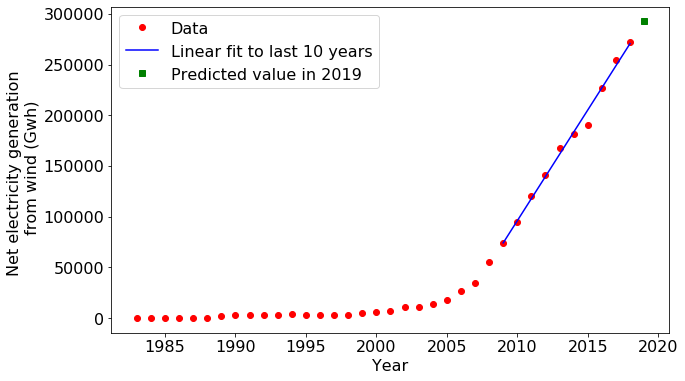

In [278]:
import numpy.polynomial.polynomial as poly

x = np.array([int(j[:4]) for j in wind_data[:,1]]) #taking the first four digits of each entry in column 1 gives us the year
y = energy

poly_coeff= poly.polyfit(x[-10:],y[-10:],deg = 1) #Get coefficients for a first-degree polynomial (straight line) fit for the most recent 10 years of data
fit = poly.polyval(x[-10:],poly_coeff)#evaluate the fitted polynomial using the polynomial coefficients

fig, ax = plt.subplots() #define a figure and axis on which to plot our data
ax.plot(x,y, 'ro', label = 'Data') #Plot the data
ax.plot(x[-10:],fit, 'b-', label = 'Linear fit to last 10 years') #Plot the fit

#Extrapolate
new_point = x[-1] + 1 #1 year after the final datapoint
fit_new_point = poly.polyval(new_point, poly_coeff)
ax.plot(new_point,fit_new_point, 'gs', label = 'Predicted value in ' + str(new_point)) #Plot the fit

#Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Net electricity generation \n from wind (Gwh)')

#add a legend
plt.legend()

plt.show()

plt.close()

Notice that the matplotlib plotting commands accepted the NumPy arrays as inputs without a problem. You will find this compatibilty with NumPy for quite a few other libraries in Python as well. This should serve as a strong indication of NumPy's core role in Python's overall data science and scientific computing capability. 

### One last plot...

It is clear from our plot above that the amount of wind-generated electricity has increased rapidly in the USA in the last ten years. But is this simply a consequence of the total electricity generation increasing, or is the national grid fundamentally changing and establishing a larger base of wind energy? NumPy can help us answer this. 

To make things more compact, we'll define a function to index certain rows from the main dataset, based on the approach we used earlier.

In [279]:
def index_energy_data(data, startyear, energy_label):
    """returns a NumPy array containing only rows with the specified energy_label in column 4, 
    that also contain energy data, and that also contain annual totals after the specifed start year """
    output = data[((data[:,4] == energy_label))]
    output = output[((output[:,2] != 'Not Available'))]
    output = output[np.array(([x[-2:] == '13' and int(x[:4]) >= startyear for x in output[:,1]]))]
    
    energy = output[:,2].astype(float)
    dates = np.array([int(j[:4]) for j in output[:,1]]) #taking the first four digits of each entry in column 1 gives us the year
    
    return energy, dates

#Now we'll apply this function to generate three arrays. Solar data was recorded from 1984 onwards,so we'll restrict all arrays to this timeframe
energy_wind, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation From Wind, All Sectors')
energy_solar, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation From Solar, All Sectors')
energy_total, dates = index_energy_data(data, 1984, energy_label = 'Electricity Net Generation Total (including from sources not shown), All Sectors')

#Let's now compute the contribution of wind, solar, and the total of the two, to total energy generation in the USA
wind_frac = 100*energy_wind/energy_total
solar_frac = 100*energy_solar/energy_total
combined_frac = 100*(energy_solar + energy_wind)/energy_total

Now we have our data. Did you notice the use of vectorization and broadcasting above? Let's proceed to plotting the results:

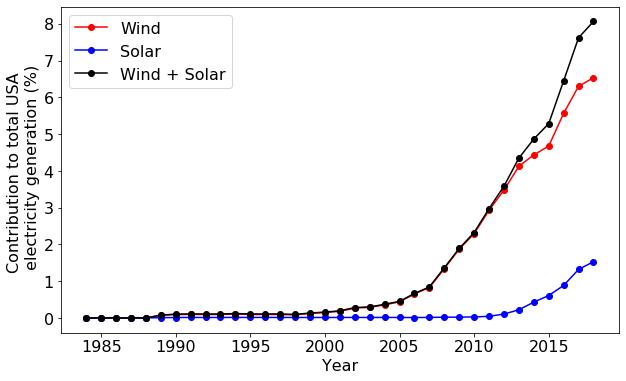

In [280]:
#Prepare the plot
fig, ax = plt.subplots() #define a figure and axis on which to plot our data
ax.plot(dates, wind_frac, 'ro-', label = 'Wind')
ax.plot(dates, solar_frac, 'bo-', label = 'Solar')
ax.plot(dates, combined_frac, 'ko-', label = 'Wind + Solar')

#Label the axes
ax.set_xlabel('Year')
ax.set_ylabel('Contribution to total USA \n electricity generation (%)')

#add a legend
plt.legend()

plt.show()

plt.close()

As this plot shows, the nature of the national grid *is* changing: there is a rapid change in the mix of electricity sources occuring. To answer further questions, like *what is driving this change?*, we would need a lot more data on the social and economic factors of the situation, but rest assured, as soon as we had that data, NumPy would be up to the task of performing the required data manipulations!

## Summary
In this article we explored some of the very useful computing tools offered by the NumPy library. We learnt about the central object of the NumPy library - the NumPy array, and learnt how to create arrays in several ways: manually, using NumPy functions, and also by loading data from a file into an array. We then explored two key tools that are especially useful when dealing with large datasets: vectorization and broadcasting. Finally, we walked through an example use of NumPy: we loaded a real set of data - of historical electricity generation in the United States - and analzed it to obtain an insight into the fundamental change in the electricity mix in recent years.

Hopefully this article has provided you with a solid overview of NumPy's capabilities. You should now be ready to start using NumPy in your code, knowing that you can always refer to the documentation (https://numpy.org/doc/) for specifics. Good luck! 